In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
path='ex1data2.txt'

In [77]:
data= pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])

In [78]:
print('data: \n', data.head())
print('describe: \n',data.describe())

data: 
    Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900
describe: 
               Size   Bedrooms          Price
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000


In [80]:
#Normalization: rescaling the data -1 to 1

data = (data - data.mean()) / data.std() #or / range

data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [84]:
data.insert(0, 'Ones', 1)
data.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [85]:
#separete x from y (training data & target)

cols = data.shape[1] # 1000 * 3 [0]= 1000 [1]= 3 
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]

print('Training data: \n', X.head())
print('Target: \n', y.head())

Training data: 
    Ones      Size  Bedrooms
0     1  0.130010 -0.223675
1     1 -0.504190 -0.223675
2     1  0.502476 -0.223675
3     1 -0.735723 -1.537767
4     1  1.257476  1.090417
Target: 
       Price
0  0.475747
1 -0.084074
2  0.228626
3 -0.867025
4  1.595389


In [87]:
#convert from dataframe to numpy matrices

X = np.matrix(X)
y = np.matrix(y)

print(X)
print(y)

theta = np.matrix(np.array([0,0,0]))
print(theta)

[[ 1.00000000e+00  1.30009869e-01 -2.23675187e-01]
 [ 1.00000000e+00 -5.04189838e-01 -2.23675187e-01]
 [ 1.00000000e+00  5.02476364e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.35723065e-01 -1.53776691e+00]
 [ 1.00000000e+00  1.25747602e+00  1.09041654e+00]
 [ 1.00000000e+00 -1.97317285e-02  1.09041654e+00]
 [ 1.00000000e+00 -5.87239800e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.21881404e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.81023044e-01 -2.23675187e-01]
 [ 1.00000000e+00 -6.37573110e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.63567023e-02  1.09041654e+00]
 [ 1.00000000e+00 -8.56737193e-04 -2.23675187e-01]
 [ 1.00000000e+00 -1.39273340e-01 -2.23675187e-01]
 [ 1.00000000e+00  3.11729182e+00  2.40450826e+00]
 [ 1.00000000e+00 -9.21956312e-01 -2.23675187e-01]
 [ 1.00000000e+00  3.76643089e-01  1.09041654e+00]
 [ 1.00000000e+00 -8.56523009e-01 -1.53776691e+00]
 [ 1.00000000e+00 -9.62222960e-01 -2.23675187e-01]
 [ 1.00000000e+00  7.65467909e-01  1.09041654e+00]
 [ 1.00000000e+00  1.29648433e+

In [88]:
print(X.shape, y.shape, theta.shape)

(47, 3) (47, 1) (1, 3)


In [89]:
#Cost function

def computeCost(X, y, theta):
  z = np.power(((X*theta.T) - y), 2)
  return np.sum(z) / (2*len(X))

print (computeCost(X, y, theta))

0.4893617021276598


In [90]:
#Gradient descent

def GD(X, y, theta, alpha, num_iterations):
  temp = np.matrix(np.zeros(theta.shape)) #matrix with 2 rows
  parameters = int(theta.ravel().shape[1]) #2
  cost = np.zeros(num_iterations) #matrix with 1000 rows

  for i in range(num_iterations):
    error = (X*theta.T) - y # h(theta) - y

    for j in range(parameters): #0 > 1
      term = np.multiply(error, X[:,j]) 
      temp[0,j] = theta[0,j] - ((alpha / len(X))) * np.sum(term)
    
    theta = temp #update theta
    cost[i] = computeCost(X, y, theta)
  
  return theta, cost

In [91]:
alpha = 0.001
num_iterations = 1000

g, cost = GD(X,y, theta, alpha,num_iterations)
print('g: ',g)
print('cost: ',cost)

g:  [[-2.99571243e-17  4.89708382e-01  1.61439744e-01]]
cost:  [0.48847475 0.48759032 0.48670841 0.48582902 0.48495213 0.48407773
 0.48320583 0.48233641 0.48146947 0.48060499 0.47974297 0.47888341
 0.47802629 0.47717161 0.47631936 0.47546954 0.47462213 0.47377714
 0.47293454 0.47209434 0.47125653 0.47042109 0.46958804 0.46875734
 0.46792901 0.46710303 0.4662794  0.4654581  0.46463914 0.4638225
 0.46300817 0.46219616 0.46138645 0.46057904 0.45977392 0.45897108
 0.45817052 0.45737223 0.4565762  0.45578242 0.4549909  0.45420162
 0.45341457 0.45262975 0.45184716 0.45106678 0.45028861 0.44951265
 0.44873887 0.44796729 0.4471979  0.44643067 0.44566562 0.44490273
 0.444142   0.44338342 0.44262699 0.44187269 0.44112052 0.44037048
 0.43962256 0.43887675 0.43813304 0.43739144 0.43665193 0.4359145
 0.43517916 0.43444589 0.43371469 0.43298556 0.43225848 0.43153345
 0.43081046 0.43008951 0.4293706  0.42865371 0.42793884 0.42722599
 0.42651514 0.42580629 0.42509944 0.42439458 0.42369171 0.42299081
 

In [92]:
print(computeCost(X, y, g))

0.18313435994592303


In [93]:
#get the min of Size & the max of Size than / it in 100 parts
x = np.linspace(data.Size.min(), data.Size.max(), 100)
print(o)

print(g)

[ 5.0269      5.22003232  5.41316465  5.60629697  5.79942929  5.99256162
  6.18569394  6.37882626  6.57195859  6.76509091  6.95822323  7.15135556
  7.34448788  7.5376202   7.73075253  7.92388485  8.11701717  8.31014949
  8.50328182  8.69641414  8.88954646  9.08267879  9.27581111  9.46894343
  9.66207576  9.85520808 10.0483404  10.24147273 10.43460505 10.62773737
 10.8208697  11.01400202 11.20713434 11.40026667 11.59339899 11.78653131
 11.97966364 12.17279596 12.36592828 12.55906061 12.75219293 12.94532525
 13.13845758 13.3315899  13.52472222 13.71785455 13.91098687 14.10411919
 14.29725152 14.49038384 14.68351616 14.87664848 15.06978081 15.26291313
 15.45604545 15.64917778 15.8423101  16.03544242 16.22857475 16.42170707
 16.61483939 16.80797172 17.00110404 17.19423636 17.38736869 17.58050101
 17.77363333 17.96676566 18.15989798 18.3530303  18.54616263 18.73929495
 18.93242727 19.1255596  19.31869192 19.51182424 19.70495657 19.89808889
 20.09122121 20.28435354 20.47748586 20.67061818 20

In [94]:
f = g[0,0] + g[0,1]*x # H(theta) = thetha0 + theta*x
print(f)

[-0.70783563 -0.68526594 -0.66269625 -0.64012655 -0.61755686 -0.59498717
 -0.57241747 -0.54984778 -0.52727809 -0.5047084  -0.4821387  -0.45956901
 -0.43699932 -0.41442963 -0.39185993 -0.36929024 -0.34672055 -0.32415086
 -0.30158116 -0.27901147 -0.25644178 -0.23387209 -0.21130239 -0.1887327
 -0.16616301 -0.14359332 -0.12102362 -0.09845393 -0.07588424 -0.05331455
 -0.03074485 -0.00817516  0.01439453  0.03696423  0.05953392  0.08210361
  0.1046733   0.127243    0.14981269  0.17238238  0.19495207  0.21752177
  0.24009146  0.26266115  0.28523084  0.30780054  0.33037023  0.35293992
  0.37550961  0.39807931  0.420649    0.44321869  0.46578838  0.48835808
  0.51092777  0.53349746  0.55606715  0.57863685  0.60120654  0.62377623
  0.64634593  0.66891562  0.69148531  0.714055    0.7366247   0.75919439
  0.78176408  0.80433377  0.82690347  0.84947316  0.87204285  0.89461254
  0.91718224  0.93975193  0.96232162  0.98489131  1.00746101  1.0300307
  1.05260039  1.07517008  1.09773978  1.12030947  1.1

Text(0.5, 1.0, 'Size vs Price')

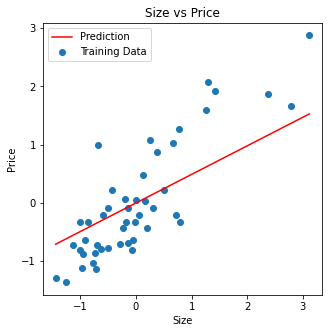

In [95]:
#plot best fit line for Size vs Price
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Size, data.Price, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Size vs Price')

Text(0.5, 1.0, 'Bedrooms vs Price')

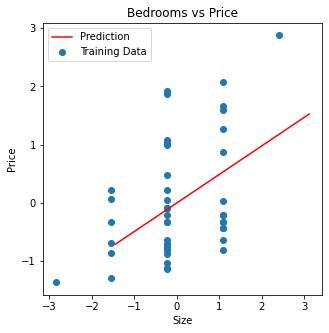

In [96]:
#plot best fit line for Bedrooms vs Prive
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Bedrooms, data.Price, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Bedrooms vs Price')

Text(0.5, 1.0, 'Error vs Training Epoch')

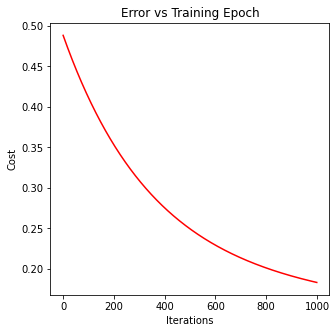

In [97]:
#plot the cost graph
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(num_iterations), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training Epoch')